In [ ]:
# 토치 11.7버전으로 다운받기
# GPU 사용할때 필요한거 !!!
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [2]:
import os
import random
import shutil

In [ ]:
pwd

'C:\\Users\\sangdal\\Desktop\\sangdal'

In [ ]:
!pip install matplotlib

In [ ]:
# 나누기

# 데이터 폴더 경로
data_folder = 'C:\\Users\\sangdal\\Desktop\\sangdal\\ju'

# 분할 비율 (train:test = 0.8:0.2)
train_ratio = 0.8

# 하위 폴더 리스트
sub_folders = ['arin', 'cha_eun_woo', 'choi_ye_na', 'hyun_bin', 'iu', 'jang_won_yeong', 'jeong_hae_in', 'taeyeon', 'karina', 'kim_nam_gil', 'kim_tae_ri', 'kim_woo_bin', 'kwon_na_ra', 'lee_jae_wook', 'lee_jong_seok', 'seo_gang_jun', 'park_eun_bin', 'park_seo_jun', 'park_so_dam', 'park_bo_yeong', 'park_bo_gum']

# train set과 test set을 저장할 폴더 경로
train_folder_path = './train'
test_folder_path = './test'

# train set과 test set을 저장할 폴더 생성
if not os.path.exists(train_folder_path):
    os.makedirs(train_folder_path)
if not os.path.exists(test_folder_path):
    os.makedirs(test_folder_path)

# 데이터셋 분할
for sub_folder in sub_folders:

    folder_path = os.path.join(data_folder, sub_folder)

    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        random.shuffle(files)
        train_size = int(len(files) * train_ratio)
        train_files = files[:train_size]
        test_files = files[train_size:]

        # train set 이동
        train_folder = os.path.join(train_folder_path, sub_folder)
        if not os.path.exists(train_folder):
            os.makedirs(train_folder)
        for file in train_files:
            src_file = os.path.join(folder_path, file)
            dest_file = os.path.join(train_folder, file)
            shutil.move(src_file, dest_file)

        # test set 이동
        test_folder = os.path.join(test_folder_path, sub_folder)
        if not os.path.exists(test_folder):
            os.makedirs(test_folder)
        for file in test_files:
            src_file = os.path.join(folder_path, file)
            dest_file = os.path.join(test_folder, file)
            shutil.move(src_file, dest_file)


In [1]:
# pytorch 관련 패키지 로드

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F

In [2]:
torch.cuda.is_available()

True

In [3]:
# gpu 사용

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
# transforms.Compose를 통해 사이즈, affine, randomhorizontalflip, tensor변환을 한꺼번에 처리

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'test': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()
    ])
}

In [5]:
# dataset 생성
image_datasets = {
    'train': datasets.ImageFolder('/content/drive/MyDrive/Temp/train', data_transforms['train']),
    'test': datasets.ImageFolder('/content/drive/MyDrive/Temp/test', data_transforms['test'])
}

# dataloader 생성
dataloaders = {
    'train': DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'test': DataLoader(
        image_datasets['test'],
        batch_size=32,
        shuffle=False
    )
}

# train과 validation에 대한 각각의 dataloader에 포함된 샘플 수 확인
print(len(dataloaders['train']))
print(len(dataloaders['test']))

134
34


In [6]:
!rm -r /content/drive/MyDrive/Temp/.ipynb_checkpoints

rm: cannot remove '/content/drive/MyDrive/Temp/.ipynb_checkpoints': No such file or directory


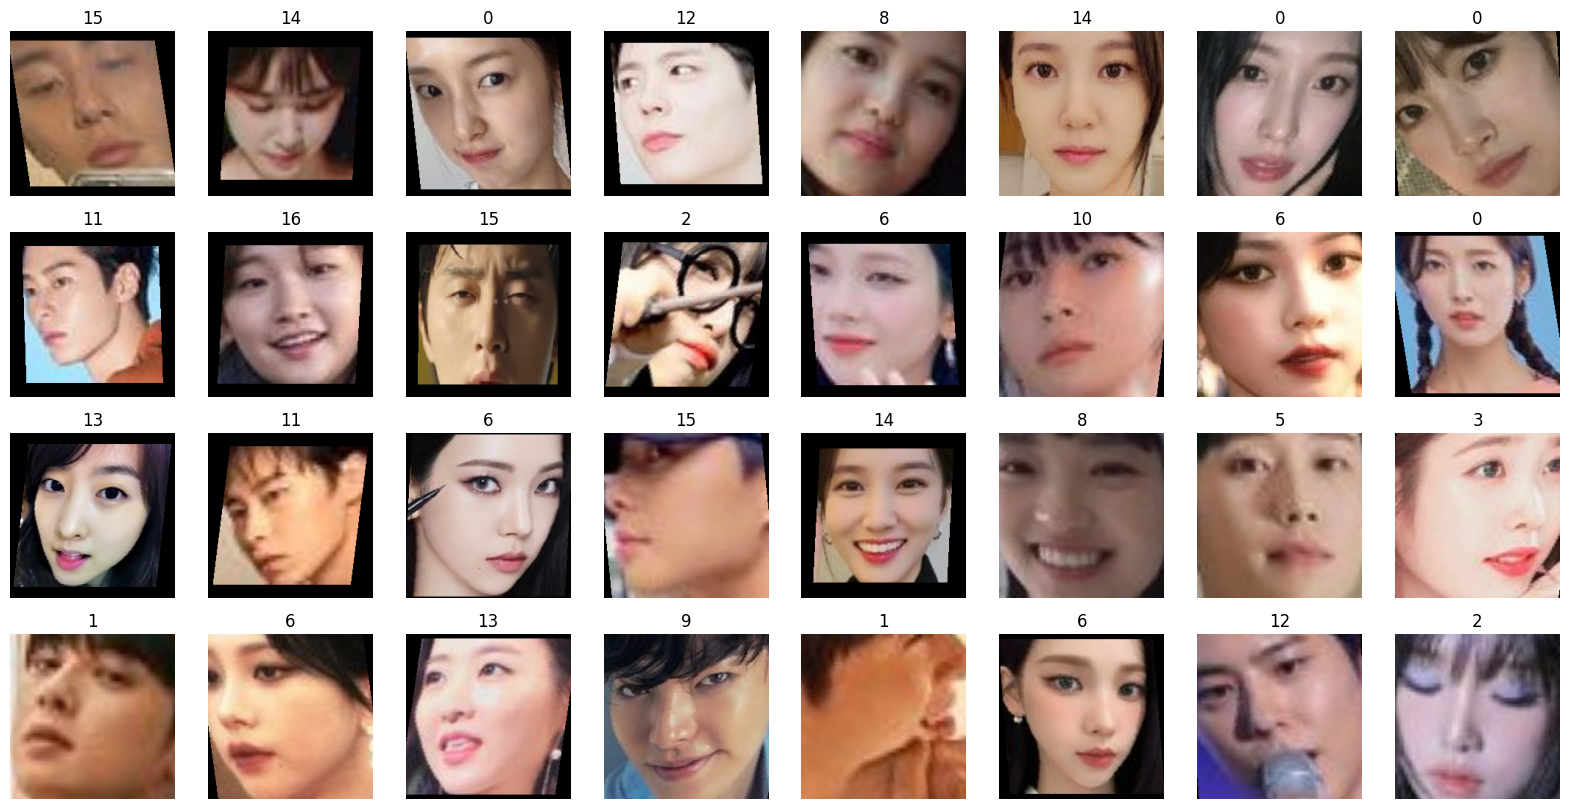

In [7]:
imgs, labels = next(iter(dataloaders['train']))
fig, axes = plt.subplots(4, 8, figsize=(20,10))

for img, label, ax in zip(imgs, labels, axes.flatten()):
  ax.set_title(label.item())
  ax.imshow(img.permute(1,2,0)) # 일반적인 탠서: (높이, 너비, 채널) # permute(1,2,0)=(너비,채널,높이)
  ax.axis('off')

In [8]:
# 데이터 하나 뽑아서 확인하기
image_datasets['test'].classes[11]

'lee_jae_wook'

In [9]:
# 모델의 사용

model = models.resnet50(weights='IMAGENET1K_V1').to(device)
print(model)
# model을 print했을 때, 맨 아래부분을 확인하여 해당부분의 이름을 확인. (예제는 Classifier)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
# 파라미터를 수정하지 않도록 설정.
for param in model.parameters():
  param.requires_grad = False # weight와 bias: 역전파에 의한 업데이트를 하지 않겠음


# 모델의 수정
model.fc = nn.Sequential(
    nn.Linear(2048, 512), # 512는 모델 중간 레이어의 출력 차원을 의미. 출력차원은 임의로 설정 가능
    nn.ReLU(), # 모델의 비선형성을 추가하는 것은 일반적인 신경망 모델의 관행
    nn.Linear(512, 18) # 최종 출력값은 149로 설정. # 최종적으로 149종의 포켓몬 중에서 분류를 진행
).to(device)

print(model)
# model을 print했을 때, 맨 아래부분을 확인하여 입력값, 출력값을 확인.

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
dataloaders['train']

In [17]:
from tqdm import tqdm

In [22]:
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

epochs = 50

for epoch in range(epochs):
    for phase in ['train', 'test']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        sum_losses = 0
        sum_accs = 0

        for x_batch, y_batch in tqdm(dataloaders[phase]):

            y_batch = y_batch.to(device)
            x_batch = x_batch.to(device)

            y_pred = model(x_batch)
            loss = nn.CrossEntropyLoss()(y_pred, y_batch)

            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # 배치단위 loss 저장
            sum_losses = sum_losses + loss.item()
        # 배치단위 정확도 저장
            y_prob = nn.Softmax(1)(y_pred) # Softmax(1): Softmax 함수가 두 번째 차원(axis)에 대해 작동
            y_pred_index = torch.argmax(y_prob, axis=1) # argmax(): 가장 큰 확률을 가지는 클래스의 인덱스를 추출
            # axis=1: 두 번째 차원에서 최댓값을 찾음

            acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100 # 백분율
            # 정확도(acc): 실제레이블(y_batch)과 예측결과(y_pred_index)를 비교하여 예측된 데이터 포인트의
            # 비율을 계산. 레이블과 예측 결과를 비교한 결과는 Boolean형태의 텐서
            sum_accs = sum_accs + acc.item()
        avg_loss = sum_losses / len(dataloaders[phase])
        avg_acc = sum_accs / len(dataloaders[phase])

        print(f'{phase:10s}:Epoch{epoch+1:4d}/{epochs}, Loss:{avg_loss:.4f}, Accuracy:{avg_acc:.2f}%')

100%|██████████| 134/134 [00:24<00:00,  5.36it/s]


train     :Epoch   1/50, Loss:1.7213, Accuracy:44.18%


100%|██████████| 34/34 [00:05<00:00,  5.91it/s]


test      :Epoch   1/50, Loss:1.9407, Accuracy:40.87%


100%|██████████| 134/134 [00:24<00:00,  5.37it/s]


train     :Epoch   2/50, Loss:1.7486, Accuracy:44.29%


100%|██████████| 34/34 [00:05<00:00,  6.02it/s]


test      :Epoch   2/50, Loss:1.9750, Accuracy:39.40%


100%|██████████| 134/134 [00:24<00:00,  5.38it/s]


train     :Epoch   3/50, Loss:1.6908, Accuracy:45.64%


100%|██████████| 34/34 [00:05<00:00,  6.08it/s]


test      :Epoch   3/50, Loss:2.0354, Accuracy:37.93%


100%|██████████| 134/134 [00:25<00:00,  5.34it/s]


train     :Epoch   4/50, Loss:1.6812, Accuracy:46.06%


100%|██████████| 34/34 [00:05<00:00,  5.87it/s]


test      :Epoch   4/50, Loss:1.9899, Accuracy:37.93%


100%|██████████| 134/134 [00:24<00:00,  5.39it/s]


train     :Epoch   5/50, Loss:1.7125, Accuracy:44.59%


100%|██████████| 34/34 [00:05<00:00,  6.10it/s]


test      :Epoch   5/50, Loss:1.9855, Accuracy:38.11%


100%|██████████| 134/134 [00:24<00:00,  5.37it/s]


train     :Epoch   6/50, Loss:1.6777, Accuracy:45.90%


100%|██████████| 34/34 [00:05<00:00,  5.98it/s]


test      :Epoch   6/50, Loss:2.0572, Accuracy:38.05%


100%|██████████| 134/134 [00:25<00:00,  5.35it/s]


train     :Epoch   7/50, Loss:1.6819, Accuracy:45.24%


100%|██████████| 34/34 [00:05<00:00,  6.11it/s]


test      :Epoch   7/50, Loss:1.9898, Accuracy:39.80%


100%|██████████| 134/134 [00:25<00:00,  5.35it/s]


train     :Epoch   8/50, Loss:1.6864, Accuracy:45.80%


100%|██████████| 34/34 [00:05<00:00,  5.92it/s]


test      :Epoch   8/50, Loss:1.9627, Accuracy:38.63%


100%|██████████| 134/134 [00:25<00:00,  5.36it/s]


train     :Epoch   9/50, Loss:1.6815, Accuracy:46.38%


100%|██████████| 34/34 [00:05<00:00,  6.10it/s]


test      :Epoch   9/50, Loss:1.9298, Accuracy:38.24%


100%|██████████| 134/134 [00:24<00:00,  5.39it/s]


train     :Epoch  10/50, Loss:1.6741, Accuracy:46.27%


100%|██████████| 34/34 [00:05<00:00,  5.96it/s]


test      :Epoch  10/50, Loss:2.0325, Accuracy:38.45%


100%|██████████| 134/134 [00:25<00:00,  5.36it/s]


train     :Epoch  11/50, Loss:1.6911, Accuracy:45.12%


100%|██████████| 34/34 [00:05<00:00,  6.02it/s]


test      :Epoch  11/50, Loss:2.0431, Accuracy:38.57%


100%|██████████| 134/134 [00:25<00:00,  5.31it/s]


train     :Epoch  12/50, Loss:1.6974, Accuracy:45.31%


100%|██████████| 34/34 [00:05<00:00,  5.94it/s]


test      :Epoch  12/50, Loss:1.9367, Accuracy:38.94%


100%|██████████| 134/134 [00:24<00:00,  5.38it/s]


train     :Epoch  13/50, Loss:1.6932, Accuracy:46.12%


100%|██████████| 34/34 [00:05<00:00,  6.06it/s]


test      :Epoch  13/50, Loss:1.9586, Accuracy:39.43%


100%|██████████| 134/134 [00:24<00:00,  5.36it/s]


train     :Epoch  14/50, Loss:1.6758, Accuracy:46.23%


100%|██████████| 34/34 [00:05<00:00,  6.03it/s]


test      :Epoch  14/50, Loss:2.0597, Accuracy:35.78%


100%|██████████| 134/134 [00:25<00:00,  5.36it/s]


train     :Epoch  15/50, Loss:1.6780, Accuracy:45.43%


100%|██████████| 34/34 [00:05<00:00,  5.92it/s]


test      :Epoch  15/50, Loss:1.9686, Accuracy:39.06%


100%|██████████| 134/134 [00:24<00:00,  5.38it/s]


train     :Epoch  16/50, Loss:1.6532, Accuracy:46.21%


100%|██████████| 34/34 [00:05<00:00,  6.11it/s]


test      :Epoch  16/50, Loss:1.9971, Accuracy:38.24%


100%|██████████| 134/134 [00:24<00:00,  5.39it/s]


train     :Epoch  17/50, Loss:1.6643, Accuracy:45.85%


100%|██████████| 34/34 [00:05<00:00,  5.94it/s]


test      :Epoch  17/50, Loss:1.9656, Accuracy:39.77%


100%|██████████| 134/134 [00:24<00:00,  5.39it/s]


train     :Epoch  18/50, Loss:1.6670, Accuracy:46.46%


100%|██████████| 34/34 [00:05<00:00,  6.13it/s]


test      :Epoch  18/50, Loss:1.9512, Accuracy:40.96%


100%|██████████| 134/134 [00:24<00:00,  5.37it/s]


train     :Epoch  19/50, Loss:1.6302, Accuracy:47.17%


100%|██████████| 34/34 [00:05<00:00,  5.74it/s]


test      :Epoch  19/50, Loss:1.9765, Accuracy:40.07%


100%|██████████| 134/134 [00:24<00:00,  5.37it/s]


train     :Epoch  20/50, Loss:1.6381, Accuracy:46.36%


100%|██████████| 34/34 [00:05<00:00,  6.07it/s]


test      :Epoch  20/50, Loss:1.9719, Accuracy:37.71%


100%|██████████| 134/134 [00:24<00:00,  5.41it/s]


train     :Epoch  21/50, Loss:1.6619, Accuracy:46.14%


100%|██████████| 34/34 [00:05<00:00,  5.86it/s]


test      :Epoch  21/50, Loss:1.9613, Accuracy:40.04%


100%|██████████| 134/134 [00:25<00:00,  5.36it/s]


train     :Epoch  22/50, Loss:1.6344, Accuracy:46.98%


100%|██████████| 34/34 [00:05<00:00,  6.10it/s]


test      :Epoch  22/50, Loss:1.9299, Accuracy:39.95%


100%|██████████| 134/134 [00:24<00:00,  5.38it/s]


train     :Epoch  23/50, Loss:1.6245, Accuracy:47.37%


100%|██████████| 34/34 [00:05<00:00,  5.88it/s]


test      :Epoch  23/50, Loss:1.9615, Accuracy:40.69%


100%|██████████| 134/134 [00:24<00:00,  5.40it/s]


train     :Epoch  24/50, Loss:1.6322, Accuracy:47.03%


100%|██████████| 34/34 [00:05<00:00,  6.10it/s]


test      :Epoch  24/50, Loss:2.0259, Accuracy:37.56%


100%|██████████| 134/134 [00:24<00:00,  5.42it/s]


train     :Epoch  25/50, Loss:1.6190, Accuracy:48.57%


100%|██████████| 34/34 [00:05<00:00,  6.04it/s]


test      :Epoch  25/50, Loss:2.1068, Accuracy:37.41%


100%|██████████| 134/134 [00:24<00:00,  5.40it/s]


train     :Epoch  26/50, Loss:1.6239, Accuracy:47.18%


100%|██████████| 34/34 [00:05<00:00,  6.03it/s]


test      :Epoch  26/50, Loss:1.9550, Accuracy:39.71%


100%|██████████| 134/134 [00:24<00:00,  5.37it/s]


train     :Epoch  27/50, Loss:1.6354, Accuracy:47.42%


100%|██████████| 34/34 [00:05<00:00,  6.01it/s]


test      :Epoch  27/50, Loss:1.9524, Accuracy:39.77%


100%|██████████| 134/134 [00:24<00:00,  5.40it/s]


train     :Epoch  28/50, Loss:1.5955, Accuracy:48.76%


100%|██████████| 34/34 [00:05<00:00,  5.98it/s]


test      :Epoch  28/50, Loss:2.0735, Accuracy:37.25%


100%|██████████| 134/134 [00:24<00:00,  5.41it/s]


train     :Epoch  29/50, Loss:1.6318, Accuracy:46.73%


100%|██████████| 34/34 [00:05<00:00,  6.14it/s]


test      :Epoch  29/50, Loss:2.0062, Accuracy:37.07%


100%|██████████| 134/134 [00:24<00:00,  5.39it/s]


train     :Epoch  30/50, Loss:1.6111, Accuracy:47.78%


100%|██████████| 34/34 [00:05<00:00,  5.87it/s]


test      :Epoch  30/50, Loss:1.9763, Accuracy:39.06%


100%|██████████| 134/134 [00:24<00:00,  5.38it/s]


train     :Epoch  31/50, Loss:1.5942, Accuracy:48.58%


100%|██████████| 34/34 [00:05<00:00,  6.10it/s]


test      :Epoch  31/50, Loss:1.9772, Accuracy:39.61%


100%|██████████| 134/134 [00:25<00:00,  5.34it/s]


train     :Epoch  32/50, Loss:1.6193, Accuracy:47.80%


100%|██████████| 34/34 [00:05<00:00,  5.85it/s]


test      :Epoch  32/50, Loss:1.9460, Accuracy:39.37%


100%|██████████| 134/134 [00:24<00:00,  5.41it/s]


train     :Epoch  33/50, Loss:1.6249, Accuracy:47.58%


100%|██████████| 34/34 [00:05<00:00,  6.10it/s]


test      :Epoch  33/50, Loss:1.9988, Accuracy:40.13%


100%|██████████| 134/134 [00:24<00:00,  5.41it/s]


train     :Epoch  34/50, Loss:1.5918, Accuracy:48.89%


100%|██████████| 34/34 [00:05<00:00,  5.95it/s]


test      :Epoch  34/50, Loss:1.9698, Accuracy:39.68%


100%|██████████| 134/134 [00:24<00:00,  5.36it/s]


train     :Epoch  35/50, Loss:1.6101, Accuracy:48.66%


100%|██████████| 34/34 [00:05<00:00,  6.06it/s]


test      :Epoch  35/50, Loss:1.9533, Accuracy:39.34%


100%|██████████| 134/134 [00:24<00:00,  5.38it/s]


train     :Epoch  36/50, Loss:1.6000, Accuracy:47.94%


100%|██████████| 34/34 [00:05<00:00,  5.95it/s]


test      :Epoch  36/50, Loss:2.0028, Accuracy:37.07%


100%|██████████| 134/134 [00:25<00:00,  5.33it/s]


train     :Epoch  37/50, Loss:1.6019, Accuracy:48.40%


100%|██████████| 34/34 [00:05<00:00,  6.01it/s]


test      :Epoch  37/50, Loss:2.0418, Accuracy:38.39%


100%|██████████| 134/134 [00:25<00:00,  5.33it/s]


train     :Epoch  38/50, Loss:1.5718, Accuracy:49.69%


100%|██████████| 34/34 [00:05<00:00,  6.02it/s]


test      :Epoch  38/50, Loss:2.0248, Accuracy:40.44%


100%|██████████| 134/134 [00:24<00:00,  5.39it/s]


train     :Epoch  39/50, Loss:1.5888, Accuracy:48.36%


100%|██████████| 34/34 [00:05<00:00,  5.96it/s]


test      :Epoch  39/50, Loss:1.9881, Accuracy:39.40%


100%|██████████| 134/134 [00:24<00:00,  5.36it/s]


train     :Epoch  40/50, Loss:1.5830, Accuracy:49.26%


100%|██████████| 34/34 [00:05<00:00,  6.12it/s]


test      :Epoch  40/50, Loss:1.9597, Accuracy:41.45%


100%|██████████| 134/134 [00:24<00:00,  5.38it/s]


train     :Epoch  41/50, Loss:1.5797, Accuracy:49.13%


100%|██████████| 34/34 [00:05<00:00,  5.94it/s]


test      :Epoch  41/50, Loss:1.9552, Accuracy:40.75%


100%|██████████| 134/134 [00:25<00:00,  5.28it/s]


train     :Epoch  42/50, Loss:1.5972, Accuracy:48.31%


100%|██████████| 34/34 [00:05<00:00,  6.06it/s]


test      :Epoch  42/50, Loss:1.9746, Accuracy:41.33%


100%|██████████| 134/134 [00:25<00:00,  5.31it/s]


train     :Epoch  43/50, Loss:1.5738, Accuracy:48.77%


100%|██████████| 34/34 [00:05<00:00,  5.82it/s]


test      :Epoch  43/50, Loss:2.0212, Accuracy:38.79%


100%|██████████| 134/134 [00:25<00:00,  5.33it/s]


train     :Epoch  44/50, Loss:1.5770, Accuracy:48.68%


100%|██████████| 34/34 [00:05<00:00,  6.05it/s]


test      :Epoch  44/50, Loss:1.9686, Accuracy:39.89%


100%|██████████| 134/134 [00:25<00:00,  5.35it/s]


train     :Epoch  45/50, Loss:1.5627, Accuracy:49.29%


100%|██████████| 34/34 [00:05<00:00,  5.84it/s]


test      :Epoch  45/50, Loss:1.9908, Accuracy:41.27%


100%|██████████| 134/134 [00:24<00:00,  5.37it/s]


train     :Epoch  46/50, Loss:1.5865, Accuracy:48.53%


100%|██████████| 34/34 [00:05<00:00,  6.05it/s]


test      :Epoch  46/50, Loss:1.9809, Accuracy:38.88%


100%|██████████| 134/134 [00:24<00:00,  5.40it/s]


train     :Epoch  47/50, Loss:1.5550, Accuracy:49.62%


100%|██████████| 34/34 [00:05<00:00,  5.88it/s]


test      :Epoch  47/50, Loss:2.0445, Accuracy:38.39%


100%|██████████| 134/134 [00:24<00:00,  5.37it/s]


train     :Epoch  48/50, Loss:1.5694, Accuracy:49.45%


100%|██████████| 34/34 [00:05<00:00,  6.05it/s]


test      :Epoch  48/50, Loss:2.0174, Accuracy:38.17%


100%|██████████| 134/134 [00:24<00:00,  5.37it/s]


train     :Epoch  49/50, Loss:1.5791, Accuracy:48.52%


100%|██████████| 34/34 [00:05<00:00,  6.00it/s]


test      :Epoch  49/50, Loss:1.9986, Accuracy:40.17%


100%|██████████| 134/134 [00:24<00:00,  5.40it/s]


train     :Epoch  50/50, Loss:1.5391, Accuracy:50.65%


100%|██████████| 34/34 [00:05<00:00,  6.02it/s]

test      :Epoch  50/50, Loss:2.0137, Accuracy:38.17%


In [24]:
# 모델 저장

torch.save(model.state_dict(), 'talent_picture.pth')

# model = models.resnet50().to(device)
# model.classifier = nn.Sequential(
#     nn.Linear(2048, 512),
#     nn.ReLU(),
#     nn.Linear(512, 21)
# ).to(device)

# # 빈 모델에 저장된 모델 불러오기
# model.load_state_dict(torch.load('talent_picture.h5'))
# model.eval()

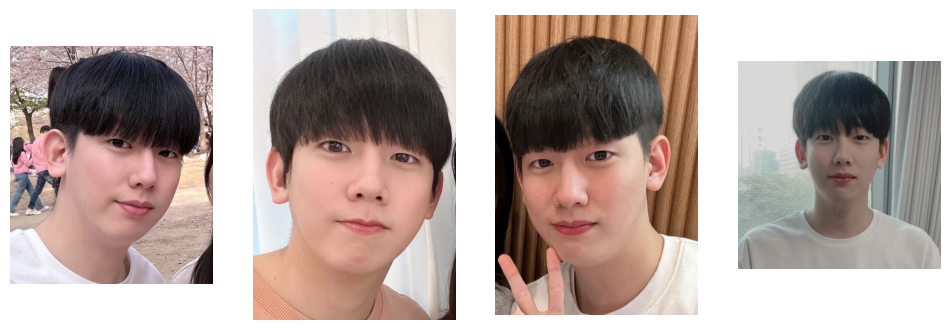

In [80]:
# 테스트

from PIL import Image

# validation의 이미지 오픈
img = Image.open('/content/drive/MyDrive/Temp/File.jpg')
img1 = Image.open('/content/drive/MyDrive/Temp/File (1).jpg')
img2 = Image.open('/content/drive/MyDrive/Temp/IMG_1221.jpg')
img3 = Image.open('/content/drive/MyDrive/Temp/jun.jpg')


fig, axes = plt.subplots(1,4,figsize=(12,6))
axes[0].imshow(img)
axes[0].axis('off')

axes[1].imshow(img1)
axes[1].axis('off')

axes[2].imshow(img2)
axes[2].axis('off')

axes[3].imshow(img3)
axes[3].axis('off')

plt.show()

In [93]:
img_input = data_transforms['test'](img)
img_input1 = data_transforms['test'](img1)
img_input2 = data_transforms['test'](img2)
img_input3 = data_transforms['test'](img3)

# 위에서 resize한 224*224와 tensor형태로 validation을 설정한 부분
print(img_input.shape)

torch.Size([3, 224, 224])


In [94]:
test_batch = torch.stack([img_input,img_input1 ,img_input2 ,img_input3]) # stack(): 붙여주는 함수
test_batch = test_batch.to(device)
test_batch.shape

torch.Size([4, 3, 224, 224])

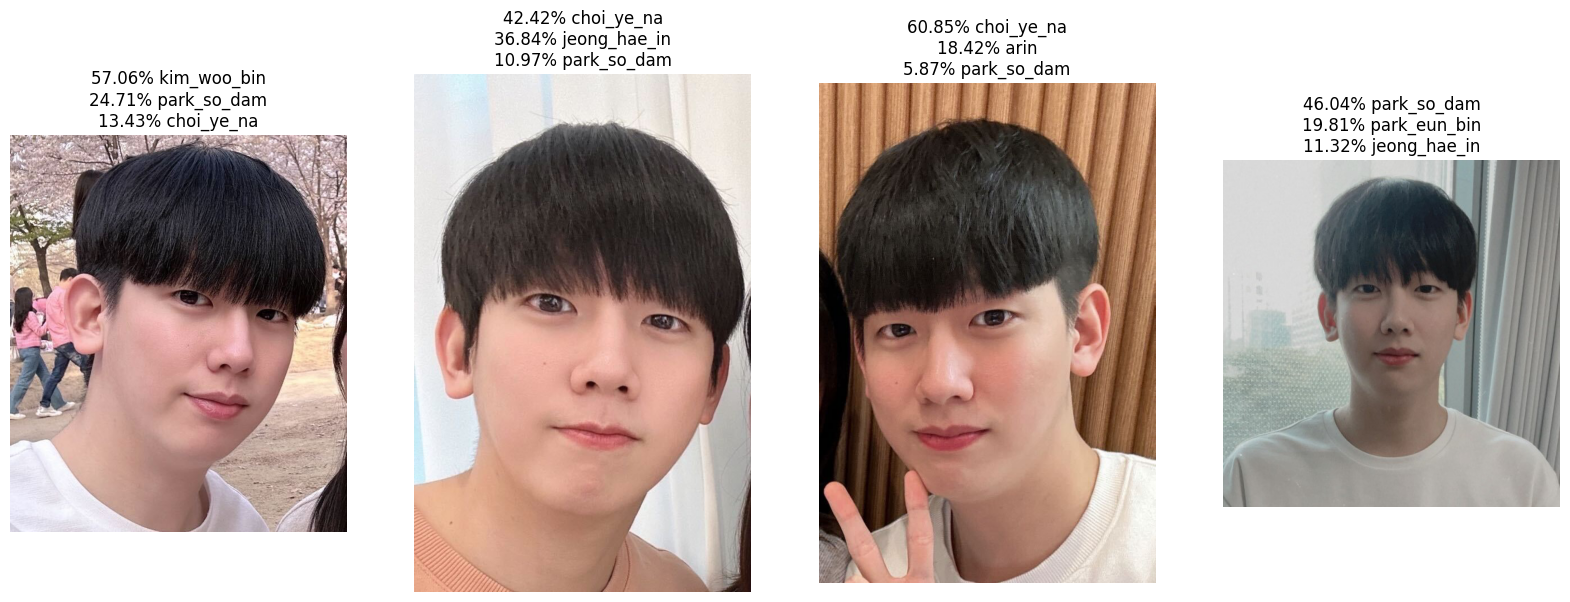

In [97]:
# 예측
y_pred = model(test_batch)
y_prob = nn.Softmax(1)(y_pred)

probs, indices = torch.topk(y_prob, k=3, axis=-1) # (2,3,224,224)에서 axis=-1은 224
# k=3은 가장 높은것에서부터 3개만 꼽는다는 의미. # probs=확률값, indices=인덱스값
probs = probs.cpu().data.numpy()
indices = indices.cpu().data.numpy()

fig, axes = plt.subplots(1, 4,figsize=(20,10))

axes[0].set_title('{:.2f}% {}\n{:.2f}% {}\n{:.2f}% {}'.format(
    probs[0,0]*100, image_datasets['test'].classes[indices[0,0]], # 1번일 확률
    probs[0,1]*100, image_datasets['test'].classes[indices[0,1]], # 2번일 확률
    probs[0,2]*100, image_datasets['test'].classes[indices[0,2]]  # 3번일 확률
))
axes[0].imshow(img)
axes[0].axis('off')

axes[1].set_title('{:.2f}% {}\n{:.2f}% {}\n{:.2f}% {}'.format(
    probs[1,0]*100, image_datasets['test'].classes[indices[1,0]], # 1번일 확률
    probs[1,1]*100, image_datasets['test'].classes[indices[1,1]], # 2번일 확률
    probs[1,2]*100, image_datasets['test'].classes[indices[1,2]]  # 3번일 확률
))
axes[1].imshow(img1)
axes[1].axis('off')

axes[2].set_title('{:.2f}% {}\n{:.2f}% {}\n{:.2f}% {}'.format(
    probs[2,0]*100, image_datasets['test'].classes[indices[2,0]], # 1번일 확률
    probs[2,1]*100, image_datasets['test'].classes[indices[2,1]], # 2번일 확률
    probs[2,2]*100, image_datasets['test'].classes[indices[2,2]]  # 3번일 확률
))
axes[2].imshow(img2)
axes[2].axis('off')

axes[3].set_title('{:.2f}% {}\n{:.2f}% {}\n{:.2f}% {}'.format(
    probs[3,0]*100, image_datasets['test'].classes[indices[3,0]], # 1번일 확률
    probs[3,1]*100, image_datasets['test'].classes[indices[3,1]], # 2번일 확률
    probs[3,2]*100, image_datasets['test'].classes[indices[3,2]]  # 3번일 확률
))
axes[3].imshow(img3)
axes[3].axis('off')


plt.show()

In [73]:
en(image_datasets['test'].classes)

NameError: ignored

In [ ]:
probs[0,0]

0.0022524942

In [ ]:
image_datasets['test'].classes[indices[0,0]]

IndexError: list index out of range

In [ ]:
# index값이 이상한 원래는 0~20까지만 나와야 하는데 [[630 998 729]] 이렇게 출력됨
probs, indices = torch.topk(y_prob, k=3, axis = -1)
probs = probs.cpu().data.numpy()
indices = indices.cpu().data.numpy()
print(probs)
print(indices)

[[0.00225249 0.0021603  0.00212562]]
[[630 998 729]]


In [ ]:
print(y_pred)

tensor([[-0.1437,  0.2291, -0.0786,  0.5459,  0.0264,  0.3644,  0.1374,  0.0824,
         -0.5035, -0.0118,  0.4390,  0.4283,  0.2140, -0.4432, -0.1145,  0.1541,
         -0.0428,  0.0212,  0.1422, -0.1082, -0.1262, -0.0800, -0.4721,  0.2582,
          0.0939, -0.2782,  0.2297, -0.5244,  0.2727, -0.0589,  0.0544, -0.0027,
          0.5352, -0.3968,  0.7590,  0.2399, -0.1884,  0.3255,  0.3028,  0.1884,
         -0.2310,  0.0864, -0.0466, -0.2776, -0.2017,  0.0299,  0.3258,  0.7541,
          0.0657, -0.3770,  0.1201,  0.4486, -0.0089,  0.1042,  0.1267, -0.1283,
         -0.1776,  0.0388,  0.0201, -0.2862,  0.2380, -0.4272,  0.0384,  0.1903,
          0.2337,  0.3299, -0.5073, -0.0886,  0.1806,  0.2340, -0.2190, -0.5387,
          0.5311, -0.1035,  0.1976, -0.1585, -0.2127, -0.4577,  0.2833, -0.3993,
         -0.2204,  0.0919, -0.4753, -0.3544, -0.0708,  0.0650, -0.0607, -0.0545,
          0.0505, -0.0146,  0.1021,  0.1453, -0.1640, -0.5546, -0.0311, -0.0255,
         -0.2987,  0.2012,  

In [ ]:
print(y_prob)

tensor([[0.0008, 0.0012, 0.0009, 0.0017, 0.0010, 0.0014, 0.0011, 0.0011, 0.0006,
         0.0010, 0.0015, 0.0015, 0.0012, 0.0006, 0.0009, 0.0011, 0.0009, 0.0010,
         0.0011, 0.0009, 0.0009, 0.0009, 0.0006, 0.0013, 0.0011, 0.0007, 0.0012,
         0.0006, 0.0013, 0.0009, 0.0010, 0.0010, 0.0017, 0.0007, 0.0021, 0.0012,
         0.0008, 0.0014, 0.0013, 0.0012, 0.0008, 0.0011, 0.0009, 0.0007, 0.0008,
         0.0010, 0.0014, 0.0021, 0.0010, 0.0007, 0.0011, 0.0015, 0.0010, 0.0011,
         0.0011, 0.0009, 0.0008, 0.0010, 0.0010, 0.0007, 0.0012, 0.0006, 0.0010,
         0.0012, 0.0012, 0.0014, 0.0006, 0.0009, 0.0012, 0.0012, 0.0008, 0.0006,
         0.0017, 0.0009, 0.0012, 0.0008, 0.0008, 0.0006, 0.0013, 0.0007, 0.0008,
         0.0011, 0.0006, 0.0007, 0.0009, 0.0010, 0.0009, 0.0009, 0.0010, 0.0010,
         0.0011, 0.0011, 0.0008, 0.0006, 0.0009, 0.0010, 0.0007, 0.0012, 0.0013,
         0.0010, 0.0006, 0.0009, 0.0008, 0.0013, 0.0011, 0.0013, 0.0010, 0.0011,
         0.0010, 0.0014, 0.0